### Problem Statement
<br> To understand the demand for shared bikes accross the US by understand the Top factors that affect the demand of the shared bikes.

### Step 1: reading and understanding the data

In [391]:
import pandas as pd
pd.set_option("display.max_columns", 100000)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [392]:
df = pd.read_csv("day.csv")
print(df.shape)
df.head()
# Dataframe has 730 Rows

(730, 16)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [393]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


The date column is a string. Changing it to datetype

In [394]:
df['dteday'] =  pd.to_datetime(df['dteday'], format='%d-%m-%Y')

In [395]:
df['dteday'].tail()

725   2019-12-27
726   2019-12-28
727   2019-12-29
728   2019-12-30
729   2019-12-31
Name: dteday, dtype: datetime64[ns]

In [396]:
# Checking Null values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

<br> None of the columns have null values

In [397]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Step2: Visualizing the data

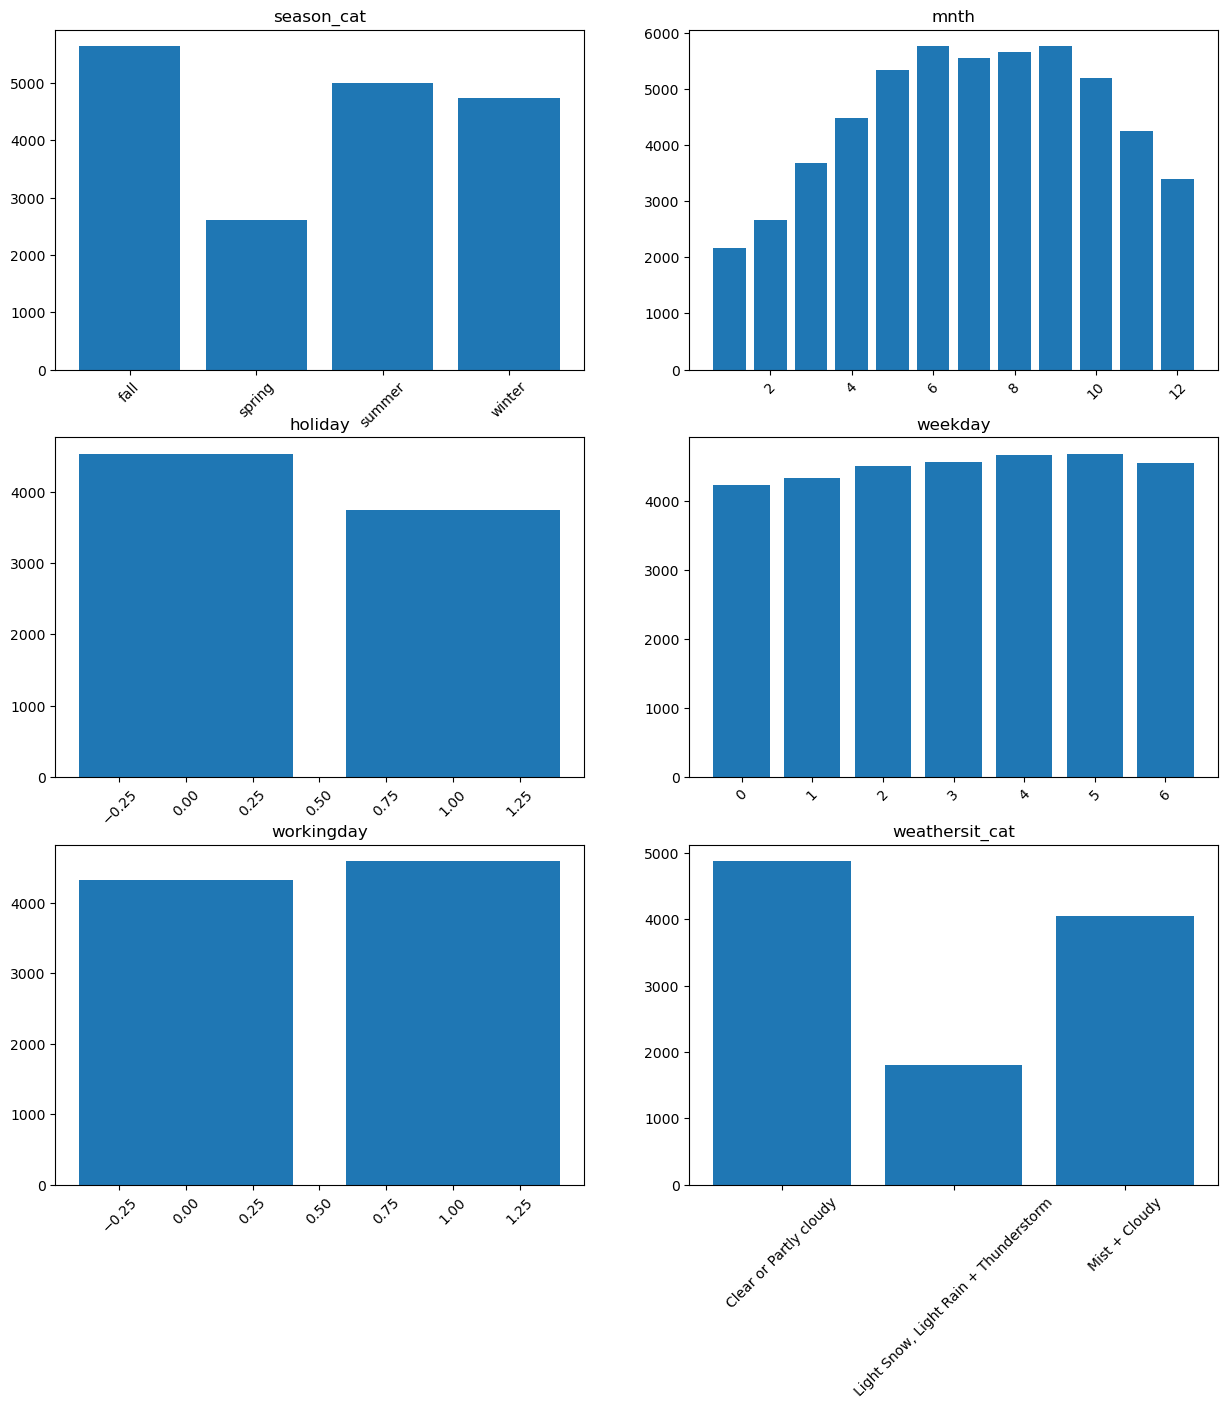

In [398]:
# Checking the demand by categorical variables - season, month, holiday, weekday, workingday, weathersit etc
fig, ax = plt.subplots(3,2, figsize = (15,15))
df_1 = df.copy()
df_1['season_cat'] = df_1.season.map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})

df_1['weathersit_cat'] = df_1.weathersit.map({1: "Clear or Partly cloudy",
2: "Mist + Cloudy",
3: "Light Snow, Light Rain + Thunderstorm",
4: "Heavy Rain + Thunderstorm + Fog"})

titles = [['season_cat', 'mnth'], ['holiday', 'weekday'], ['workingday', 'weathersit_cat']]
for row in range(len(titles)):    
    for col in range(len(titles[row])):
        temp = df_1.groupby([titles[row][col]])['cnt'].mean().reset_index()
        
        ax[row, col].bar(temp[titles[row][col]], temp['cnt'])
        ax[row, col].set_title(titles[row][col])
        ax[row, col].tick_params(axis='x', rotation=45)


##### Observations:
<br> 1. Demand is low when there is rain and snow. 
<br> 2. Demand is highest on the non-holoday than a holiday. 
<br> 3. By seasons, the demand rises in fall
<br> 4. Demand is almost similar on a working day VS not a working day
<br> 5. Seasonaility - Later end of the year sees a higher demans


[]

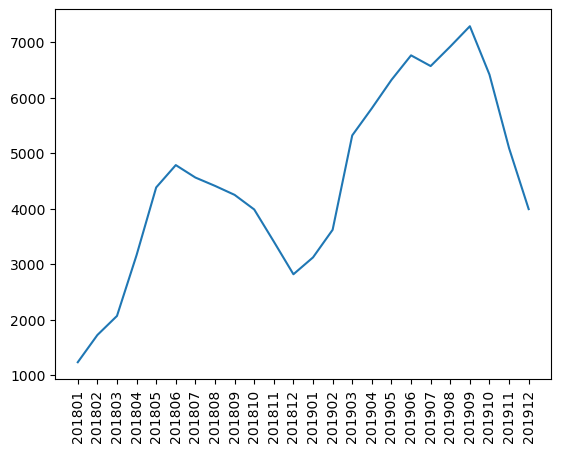

In [399]:
#Checking the demand through 2018 and 2019 by year and month 
df_1 = df.copy()
df_1['dteday'] =  pd.to_datetime(df['dteday'], format='%d-%m-%Y')
df_1['yearmonth'] = df_1['dteday'].dt.strftime('%Y%m')
temp = df_1.groupby(['yearmonth'])['cnt'].mean().reset_index()
plt.plot(temp['yearmonth'], temp['cnt'])
plt.xticks(rotation = 90)
plt.plot()

<br> Demand has strictly increase in 2019
<br> However, On checking, the trend for 2018 and 2019 for categorical variables is the same. That is, the demand is higher on a non-holiday than a holiday, demand goes up towards the end of the year hold consistently for both

In [400]:
np.polyfit(df_1['temp'], df_1['cnt'], deg = 1)

array([ 161.71684954, 1222.04026376])

{'whiskers': [<matplotlib.lines.Line2D at 0x201bdf1f040>,
 'caps': [<matplotlib.lines.Line2D at 0x201bdf1d6f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x201bdf1ecb0>],
 'medians': [<matplotlib.lines.Line2D at 0x201bdf1f910>],
 'fliers': [<matplotlib.lines.Line2D at 0x201bdf1fc70>],
 'means': []}

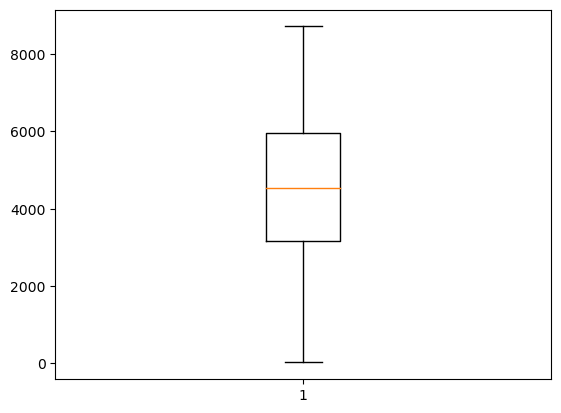

In [401]:
# Checking the target variable values
plt.boxplot(df_1['cnt'])

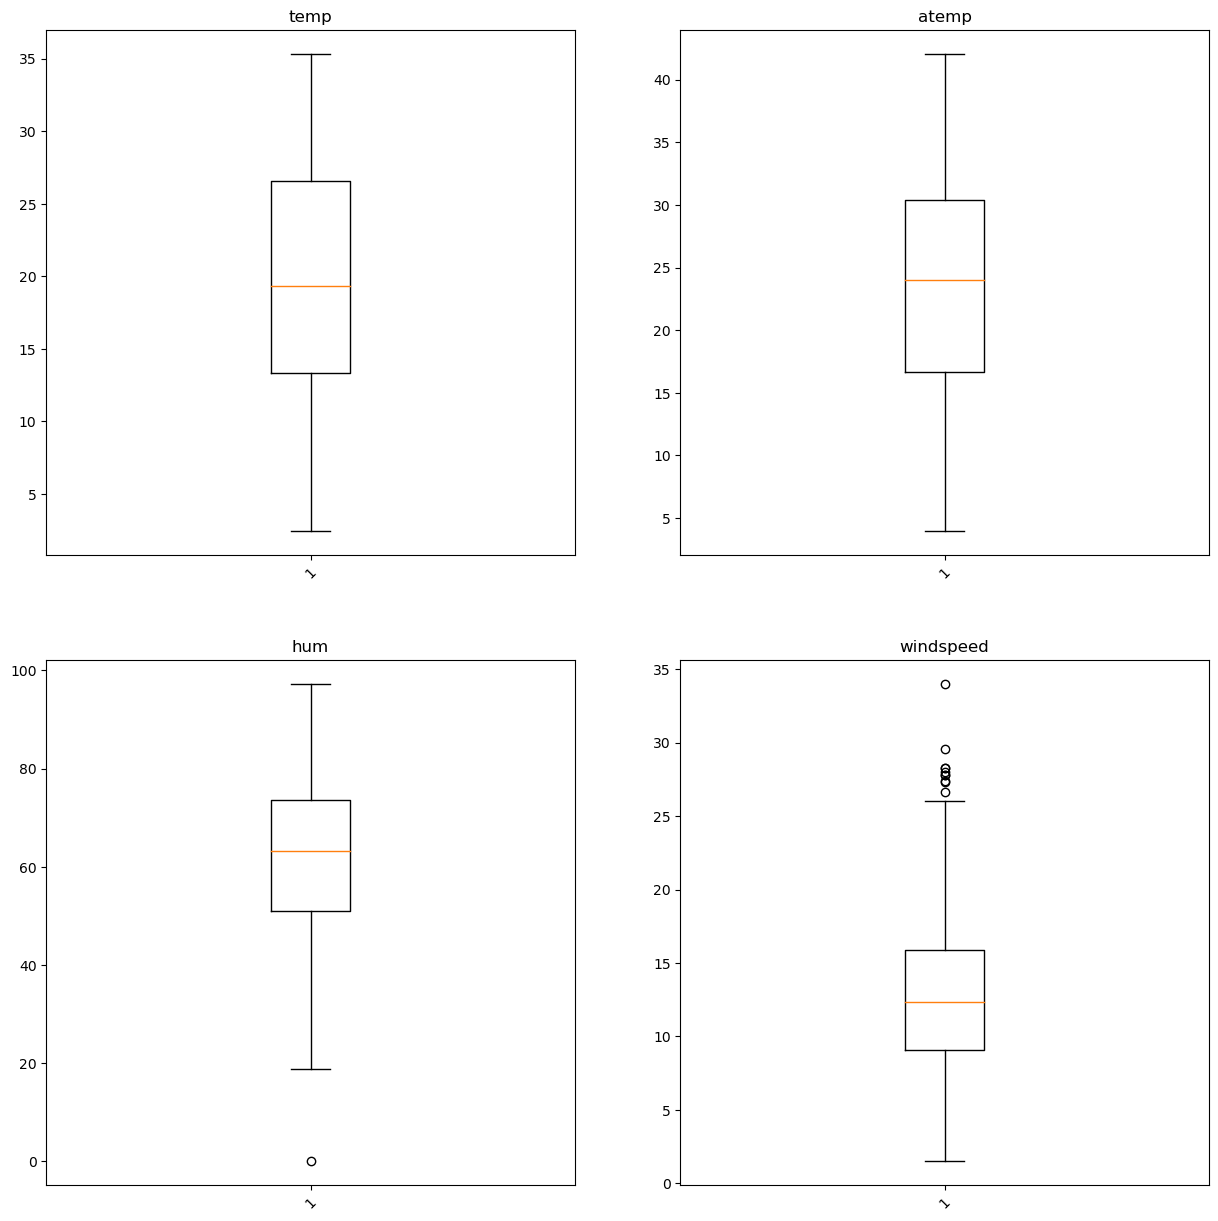

In [402]:
# Checking numerical columns for outliers:
fig, ax = plt.subplots(2,2, figsize = (15,15))
titles = [['temp', 'atemp'],['hum', 'windspeed']]

for row in range(len(titles)):    
    for col in range(len(titles[row])):
        temp = df_1.groupby([titles[row][col]])['cnt'].mean().reset_index()  
        ax[row, col].boxplot(temp[titles[row][col]])
        ax[row, col].set_title(titles[row][col])
        ax[row, col].tick_params(axis='x', rotation=45)
        

##### Observations:
1. Not a lot of outliers in all the numerical columns except for a few in Windspeed

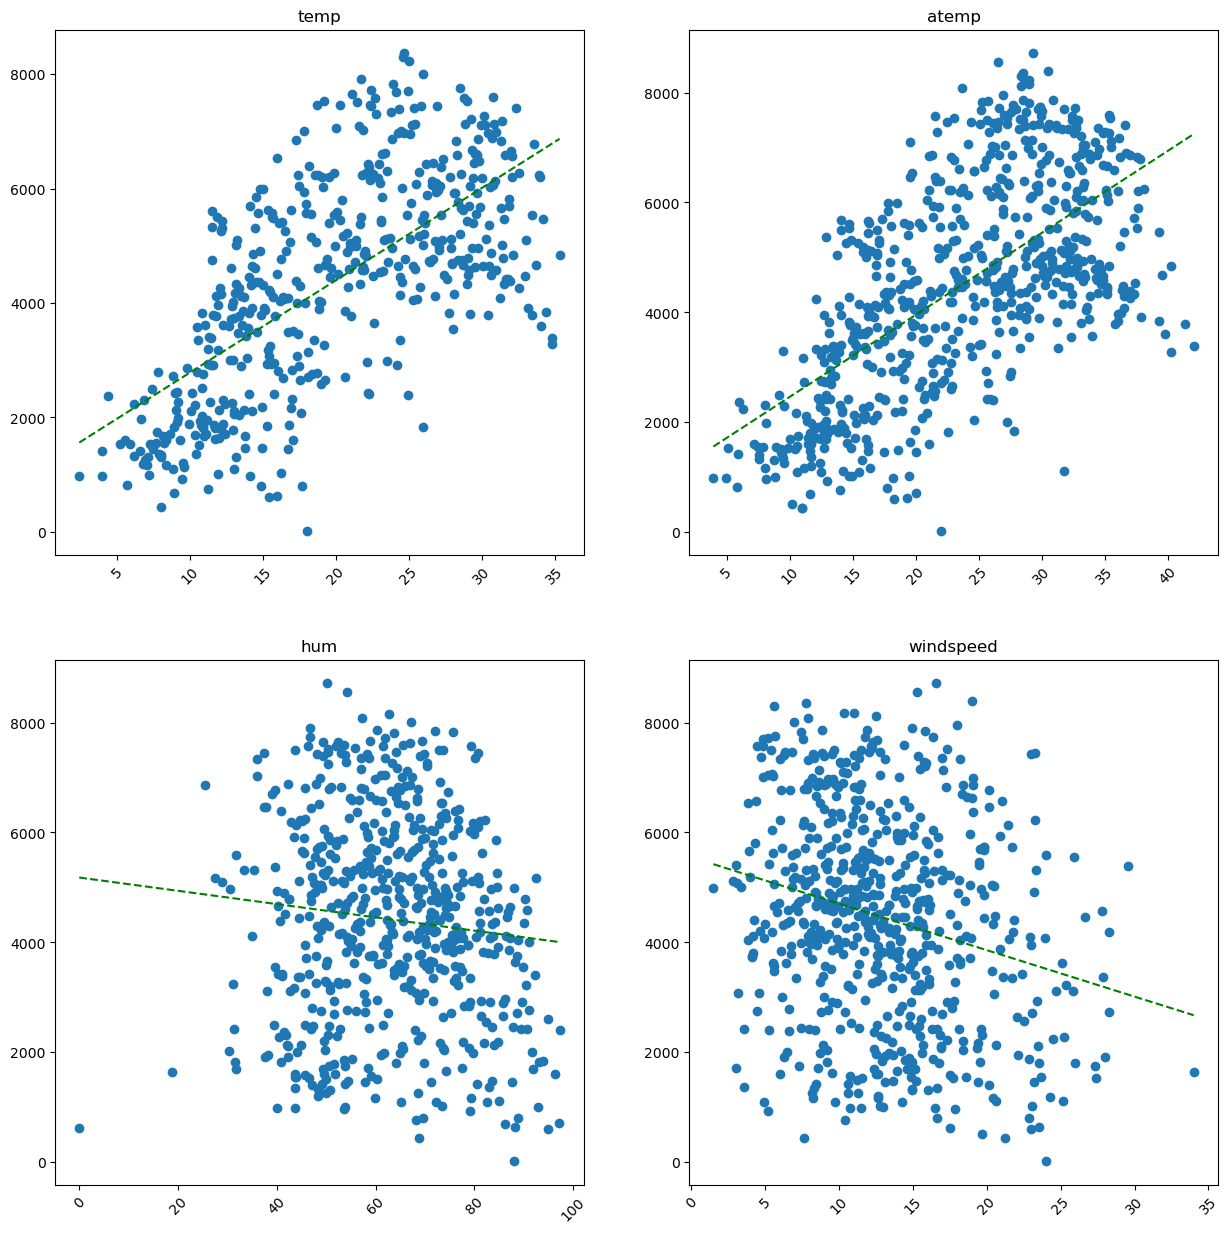

In [403]:
# Checking corr for numerical columns:
fig, ax = plt.subplots(2,2, figsize = (15,15))
titles = [['temp', 'atemp'],['hum', 'windspeed']]

for row in range(len(titles)):    
    for col in range(len(titles[row])):
        temp = df_1.groupby([titles[row][col]])['cnt'].mean().reset_index()  
        ax[row, col].scatter(temp[titles[row][col]], temp['cnt'])
        coefficients = np.polyfit(temp[titles[row][col]], temp['cnt'], deg=1)  # Linear fit (degree=1)
        trendline = np.polyval(coefficients, temp[titles[row][col]])  # Evaluate polynomial at x point
        ax[row, col].plot(temp[titles[row][col]], trendline, color='green', linestyle='--')
        ax[row, col].set_title(titles[row][col])
        ax[row, col].tick_params(axis='x', rotation=45)
        

### Observations:
1. temperature and feels like temperature shows a good correlation with the demand. 
2. humidity and windspeed seems to weekly correlated with the demand 

### plotting a grid to check for correlations

C:\Users\piyus\AppData\Local\Temp\ipykernel_31312\3672102681.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_1.corr(), cmap  = 'viridis')


<Axes: >

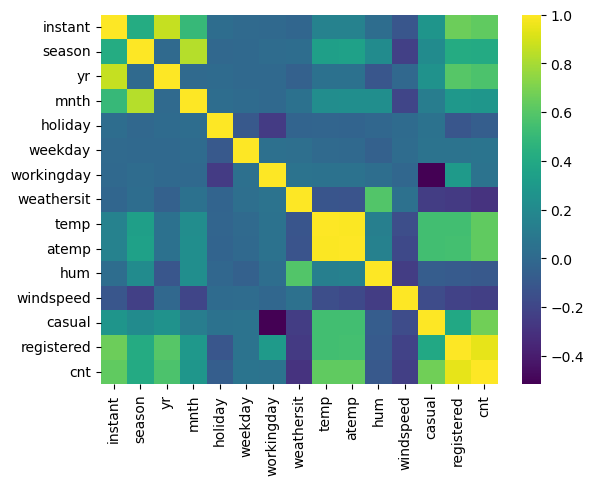

In [404]:
sns.heatmap(df_1.corr(), cmap  = 'viridis')

### Observation
Out of all the variables, our target seems to have a high correlation with year & temperature.
This is only for the numerical columns. We will check this again after preparing the data. 

# Data Preparation:

<br> Creating Dummy Variables:
<br> 1. we will change season and weathersit to dummy variables as other categorical variables are already dummy, or have a sequence that makes sense.

<br> to do this, we will first have to extract the season out of the season columns. And the weather from weather column

<br> 2. From the categorical analysis, we found that weekday seems to be correlated with the demand, That is, the more number of days into a week, the higher is the demand. Hence we will not change the variable. 
<br> 3. Similar is the case with year, as time passes, the demand for cycles increases. So we will keep the variable as is. 

In [405]:
# Changing Seasons to dummy variables and dropping one of the variable

df_1 = df.copy()
df_1['season_cat'] = df_1.season.map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})
df_1 = pd.concat((df_1, pd.get_dummies(df_1['season_cat'])), axis = 1)
df_1 = df_1.drop(['winter'], axis = 1)
df_1.groupby(['season_cat']).agg({'instant':'count','spring':'sum', 'fall':'sum', 'summer':'sum'})

,instant,spring,fall,summer
season_cat,,,,
fall,188,0,188,0
spring,180,180,0,0
summer,184,0,0,184
winter,178,0,0,0


In [406]:
# Changing weathersit to dummy variables and dropping one of the variable


df_1['weathersit_cat'] = df_1.weathersit.map({1: "Clear_or_Partly_cloudy",
2: "Mist_plus_Cloudy",
3: "Light_Snow_and_Rain_and_Thunderstorm",
4: "Heavy_Rain_Thunderstorm_Fog"})

df_1 = pd.concat((df_1, pd.get_dummies(df_1['weathersit_cat'])), axis = 1)
df_1 = df_1.drop(['Mist_plus_Cloudy'], axis = 1)
df_1.groupby(['weathersit_cat']).agg({'instant':'count','Clear_or_Partly_cloudy':'sum', 'Light_Snow_and_Rain_and_Thunderstorm':'sum'})


,instant,Clear_or_Partly_cloudy,Light_Snow_and_Rain_and_Thunderstorm
weathersit_cat,,,
Clear_or_Partly_cloudy,463,463,0
Light_Snow_and_Rain_and_Thunderstorm,21,0,21
Mist_plus_Cloudy,246,0,0


### Creating extra columns
<br> Creating the following extra columns to see if they have a better correlation with the target variable
1. is_weekend - If the day is a weekend. 
2. We have seen that the demand increases as the year progresses, so we will create a variable - day of the year
3. temperature difference between actual temperature and feels like temperature. 
4. We are also going to try to add the previous day demand to the data - This will be known to us on a particular day. THis will capture the timeseries essence of the model


In [407]:

df_1['is_weekend'] = df_1['weekday'].isin([6, 0]).astype(int)
df_1['day_of_year'] = df_1['dteday'].dt.dayofyear
df_1['temp_diff'] = df_1['atemp'] - df_1['temp']
df_1['previous_day_demand'] = df_1['cnt'].shift(1)

In [408]:
df_1.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_cat,fall,spring,summer,weathersit_cat,Clear_or_Partly_cloudy,Light_Snow_and_Rain_and_Thunderstorm,is_weekend,day_of_year,temp_diff,previous_day_demand
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,spring,0,1,0,Mist_plus_Cloudy,0,0,1,1,4.070403,NaN
1,2,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,spring,0,1,0,Mist_plus_Cloudy,0,0,1,2,2.784352,985.0
2,3,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,spring,0,1,0,Clear_or_Partly_cloudy,1,0,0,3,1.419326,801.0
3,4,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,spring,0,1,0,Clear_or_Partly_cloudy,1,0,0,4,2.406100,1349.0
4,5,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,spring,0,1,0,Clear_or_Partly_cloudy,1,0,0,5,2.158263,1562.0


C:\Users\piyus\AppData\Local\Temp\ipykernel_31312\3619240962.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_1.corr(), annot = True, cmap="YlGnBu")


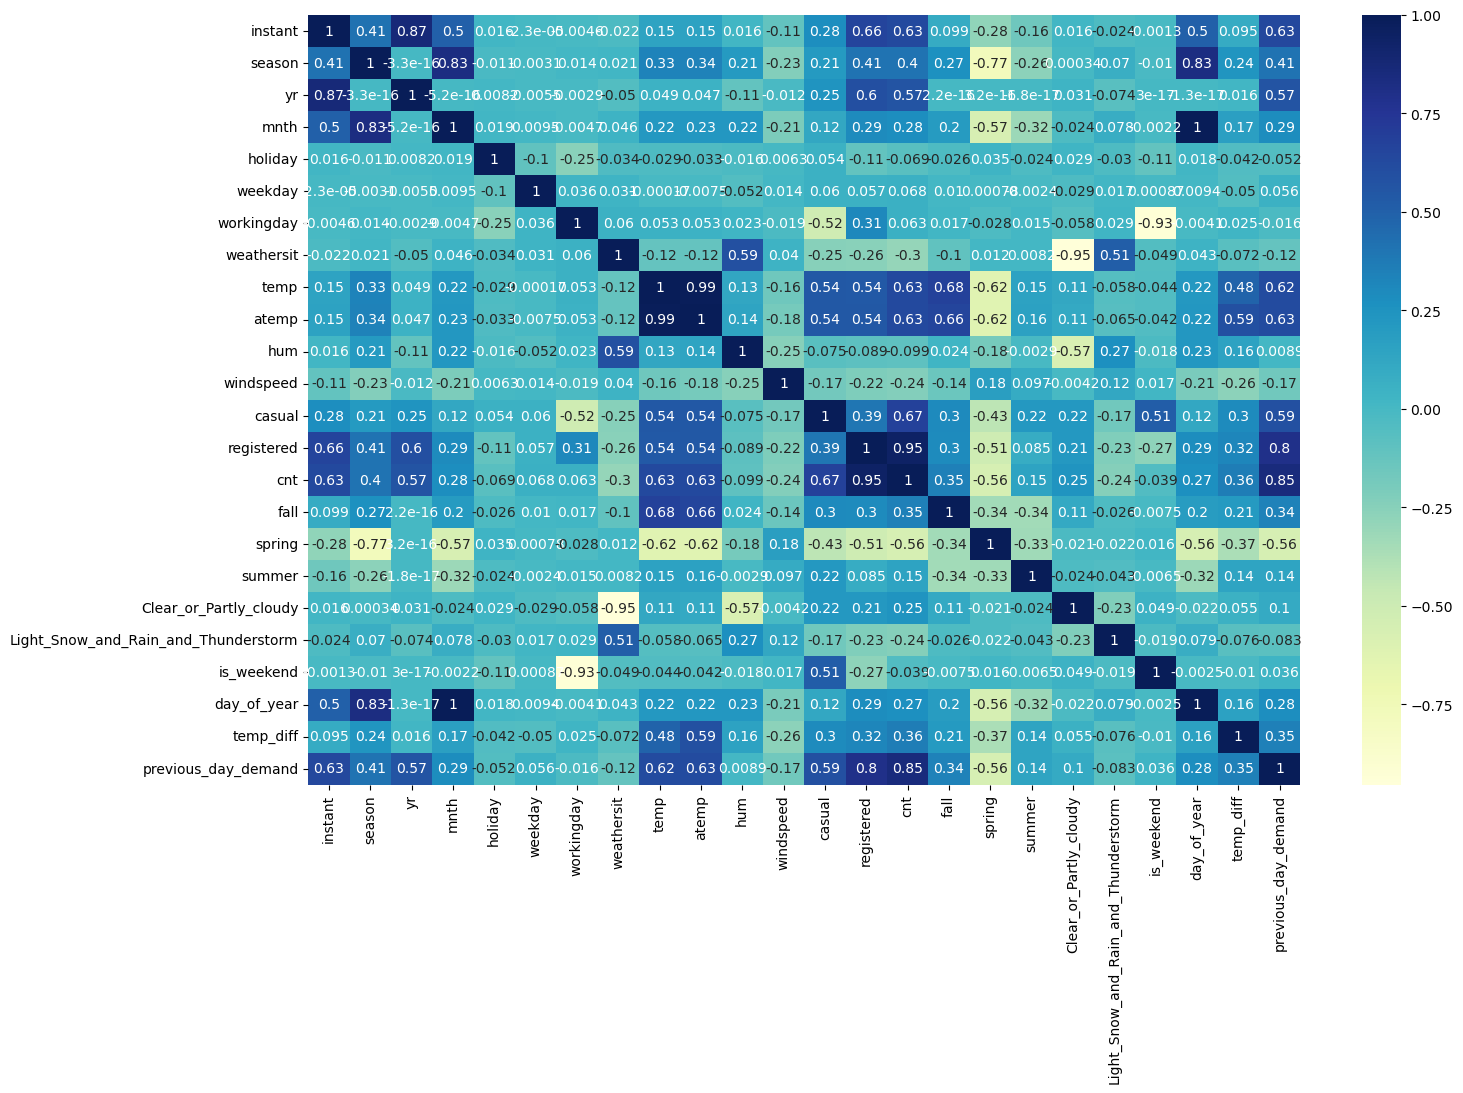

In [409]:
# Checking the correlation for these variables
temp = df_1[['yr', 'mnth', 'holiday', 'weekday','workingday','temp', 'atemp', 'hum', 'windspeed','fall','spring', 'summer', 
     'Clear_or_Partly_cloudy', 'Light_Snow_and_Rain_and_Thunderstorm', 'cnt', 'is_weekend', 'day_of_year', 'temp_diff', 'previous_day_demand']]
plt.figure(figsize = (16, 10))
sns.heatmap(df_1.corr(), annot = True, cmap="YlGnBu")
plt.show()

Is weekend does not discriminate much in terms of demand. 

Text(0.5, 1.0, 'demand ')

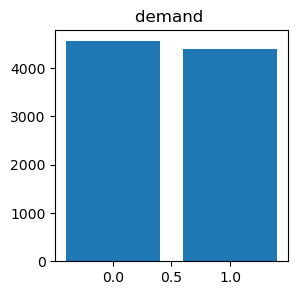

In [410]:
temp = df_1.groupby(['is_weekend'])['cnt'].mean().reset_index()
plt.figure(figsize = (3, 3))
plt.bar(temp['is_weekend'], temp['cnt'])
plt.title('demand ')

### Observation from the heatmap and above barplot:
1. temp & atemp are highly correlated, and one of them can be dropped
2. out newly created columns - is_weekend does not add much value as it is highly negatively correlated with workingday and not correlated with cnt
3. temp_diff is also highly correlated with the temp and atemp. better to drop these as atemp is a better metric by which as user will make their decision 
4. previous_day_demand has a very strong correlation with the target - however, this would mean that we would be able to make
   make only one day prediction at a time and there is no business sense in keeping this.  

In [411]:
# Dropping the unnecessary columns:
# Instant, dteday will not add any direct value to the model. 
# season and weathersit have already been converted to dummy column. 
# is weekend can be 
drop_list = ['instant', 'dteday', 'season', 'temp', 'casual', 'registered', 'season_cat','weathersit', 'weathersit_cat', 'is_weekend', 'day_of_year', 'temp_diff', 'previous_day_demand']
df_1 = df_1.drop(drop_list, axis = 1)

### Step 4: Splitting the Data into Training and Testing Sets

In [412]:
from sklearn.model_selection import train_test_split

np.random.seed(10)
X_train, X_test, y_train, y_test = train_test_split(df_1.drop(['cnt'], axis = 1), df_1['cnt'], train_size = 0.7, test_size = 0.3, random_state = 100)

### Scaling the Numerical variables
Since we have a mix of dummy and numerical variables, we want to ensure that the data is to the right scale so that the co-efficients of each variable is not extreme. 
We will use the MinMaxScalar to scale the variables in a particular range. 


In [413]:
X_train.head()

,yr,mnth,holiday,weekday,workingday,atemp,hum,windspeed,fall,spring,summer,Clear_or_Partly_cloudy,Light_Snow_and_Rain_and_Thunderstorm
653,1,10,0,2,1,23.0423,55.8333,12.208807,0,0,0,1,0
576,1,7,0,2,1,33.1448,70.4167,11.083475,1,0,0,1,0
426,1,3,0,6,0,20.6746,62.1250,10.792293,0,1,0,0,0
728,1,12,0,0,0,11.5850,48.3333,23.500518,0,1,0,1,0
482,1,4,0,6,0,18.8752,48.9583,8.708325,0,0,1,0,0


In [414]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

num_vars = ['atemp', 'hum', 'windspeed']

scaler.fit(X_train[num_vars])
X_train[num_vars] = scaler.transform(X_train[num_vars])

In [415]:
X_train.head()

,yr,mnth,holiday,weekday,workingday,atemp,hum,windspeed,fall,spring,summer,Clear_or_Partly_cloudy,Light_Snow_and_Rain_and_Thunderstorm
653,1,10,0,2,1,0.501133,0.575354,0.300794,0,0,0,1,0
576,1,7,0,2,1,0.766351,0.725633,0.264686,1,0,0,1,0
426,1,3,0,6,0,0.438975,0.640189,0.255342,0,1,0,0,0
728,1,12,0,0,0,0.200348,0.498067,0.663106,0,1,0,1,0
482,1,4,0,6,0,0.391735,0.504508,0.188475,0,0,1,0,0


[]

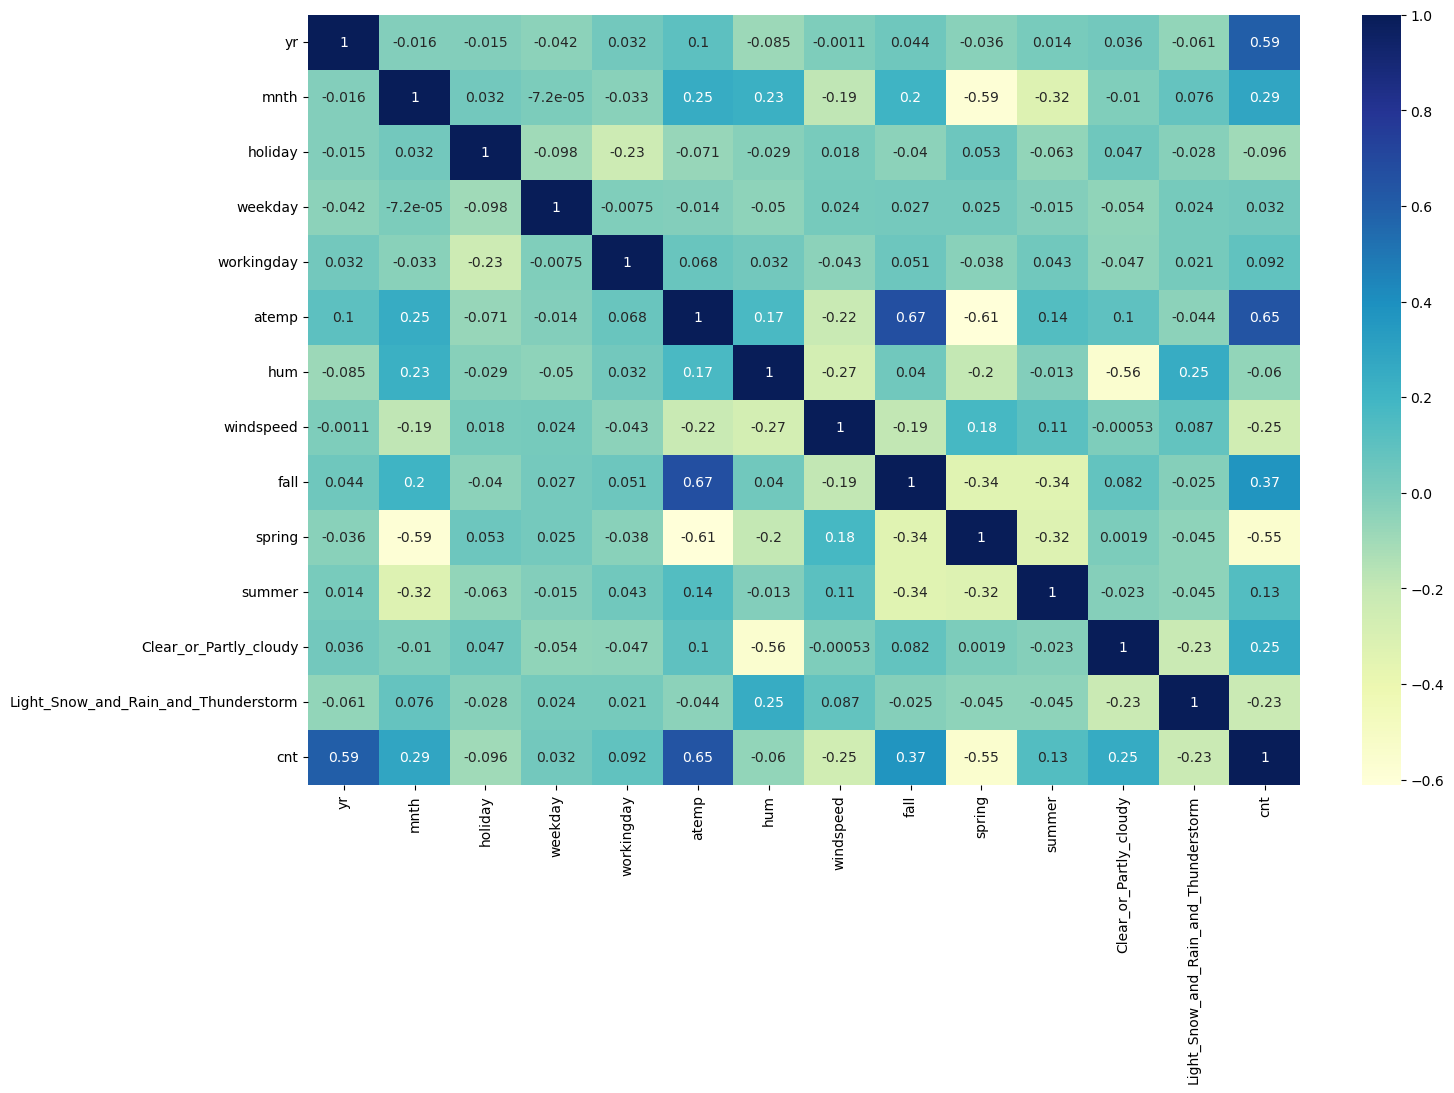

In [416]:
# Checking correlation
plt.figure(figsize = (16, 10))
sns.heatmap(pd.concat((X_train, y_train), axis = 1).corr(), annot = True, cmap="YlGnBu")
plt.plot()

### Building our first version of the model
we will use statsmodel to first try just one variable - atemp (it has the highest correlation with our target)

In [417]:
import statsmodels.api as sm

X_train_lm = sm.add_constant(X_train[['atemp']])
lr = sm.OLS(y_train, X_train_lm).fit()

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     364.7
Date:                Sun, 01 Dec 2024   Prob (F-statistic):           1.10e-61
Time:                        17:20:12   Log-Likelihood:                -4449.3
No. Observations:                 510   AIC:                             8903.
Df Residuals:                     508   BIC:                             8911.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1438.1323    172.721      8.326      0.0

Even though the r-squared 0.418 is low, it indicates the strength of the atemp column as a predictor. 
we will try by adding more variables. This coupled by the low p-value of the column idciates that this is a strong predictor

In [418]:
import statsmodels.api as sm

X_train_lm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_lm).fit()

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     186.8
Date:                Sun, 01 Dec 2024   Prob (F-statistic):          1.54e-181
Time:                        17:20:13   Log-Likelihood:                -4134.8
No. Observations:                 510   AIC:                             8298.
Df Residuals:                     496   BIC:                             8357.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


### Observations. 
1. Variables like "summer" and "mnth" Have a high p-value indicating that they are not strong contributors to the model. We can drop them once we supplement this decision using the VIF score. 
2. Looking at the coefficients - year and atemp seem to be the the highest impacting variables. In Business terms, this would mean the Y-o-Y growth of demand makes the most difference in the data. Also, it would mean that the demand heavily depends on the temperature and weather outside. This is corroborated by the fact that Clear_or_Partly_cloudy and windspeed columns also have a high magnitude coefficients

### Checking the VIF scores of the columns

In [419]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['feature'] = X_train.columns
vif_data['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

# Display the VIF for each feature
print(vif_data)

                                 feature        VIF
0                                     yr   2.050799
1                                   mnth  13.354212
2                                holiday   1.104168
3                                weekday   3.179082
4                             workingday   3.209832
5                                  atemp  21.715106
6                                    hum  23.057858
7                              windspeed   4.688778
8                                   fall   4.598572
9                                 spring   4.715716
10                                summer   4.432156
11                Clear_or_Partly_cloudy   3.462463
12  Light_Snow_and_Rain_and_Thunderstorm   1.150482


### Observation:
1. Mnth, atemp and hum columns have an extremely high VIF. 
we will now try to drop the mnth column and check VIF again. 

In [420]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


X = X_train.drop(['mnth'], axis = 1)
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]


# Display the VIF for each feature
print(vif_data)

                                 feature        VIF
0                                     yr   2.046618
1                                holiday   1.098189
2                                weekday   3.071475
3                             workingday   3.192654
4                                  atemp  21.325771
5                                    hum  13.552990
6                              windspeed   4.348488
7                                   fall   3.955130
8                                 spring   2.169383
9                                 summer   2.374472
10                Clear_or_Partly_cloudy   2.968373
11  Light_Snow_and_Rain_and_Thunderstorm   1.144258


Both atemp and hum have a high VIF. we will try to drop a few more columns (in iterations) humidity column before we drop the atemp column. We have dropped the summer column because it has a very high p-value kept dropping columns with high VIF

In [421]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


X = X_train.drop(['mnth', 'hum','summer','fall', 'spring'], axis = 1)
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]


# Display the VIF for each feature
print(vif_data)

                                feature       VIF
0                                    yr  2.010422
1                               holiday  1.068354
2                               weekday  2.810036
3                            workingday  2.891194
4                                 atemp  4.758838
5                             windspeed  3.420491
6                Clear_or_Partly_cloudy  2.676799
7  Light_Snow_and_Rain_and_Thunderstorm  1.091908


Dropping the variables and updating the model

In [422]:
import statsmodels.api as sm
X_train = X_train.drop(['mnth', 'hum','summer','fall'], axis = 1)
X_train_lm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_lm).fit()

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     256.3
Date:                Sun, 01 Dec 2024   Prob (F-statistic):          5.44e-181
Time:                        17:20:13   Log-Likelihood:                -4147.4
No. Observations:                 510   AIC:                             8315.
Df Residuals:                     500   BIC:                             8357.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


### Residual Analysis of train data
1. Checking if error terms are normally distributed. 

C:\Users\piyus\AppData\Local\Temp\ipykernel_31312\2527088050.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_predict), bins = 20)


Text(0.5, 0, 'Errors')

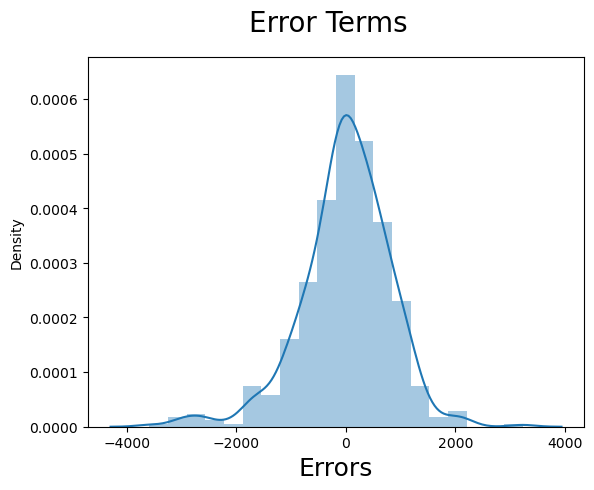

In [423]:
y_train_predict = lr.predict(X_train_lm)
fig = plt.figure()
sns.distplot((y_train - y_train_predict), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                     

 The error terms seem to be have a mean of 0. 

### Running the model on the test dataset

In [424]:
X_test.columns

Index(['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'atemp', 'hum',
       'windspeed', 'fall', 'spring', 'summer', 'Clear_or_Partly_cloudy',
       'Light_Snow_and_Rain_and_Thunderstorm'],
      dtype='object')

In [425]:
X_train.columns

Index(['yr', 'holiday', 'weekday', 'workingday', 'atemp', 'windspeed',
       'spring', 'Clear_or_Partly_cloudy',
       'Light_Snow_and_Rain_and_Thunderstorm'],
      dtype='object')

In [426]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     256.3
Date:                Sun, 01 Dec 2024   Prob (F-statistic):          5.44e-181
Time:                        17:20:13   Log-Likelihood:                -4147.4
No. Observations:                 510   AIC:                             8315.
Df Residuals:                     500   BIC:                             8357.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [427]:
from sklearn.preprocessing import MinMaxScaler

# Fitting the mix max scalar on the train data and applying it to the test dataset
num_vars = ['atemp', 'hum', 'windspeed']
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [428]:
# Final columns that we had kept in the training data 
cols_to_keep = ['yr', 'holiday', 'weekday', 'workingday', 'atemp', 'windspeed',
       'spring', 'Clear_or_Partly_cloudy',
       'Light_Snow_and_Rain_and_Thunderstorm']
X_test = X_test[cols_to_keep]
X_test1 = sm.add_constant(X_test)
y_test_predict = lr.predict(X_test1)

### Model Evaluation

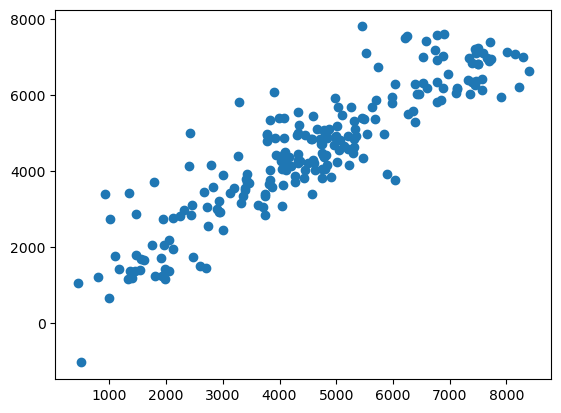

In [429]:
# Plotting y_pred VS y_test
plt.scatter(y_test, y_test_predict)

In [431]:
from sklearn.metrics import r2_score
print("The R2 score on the test dataset is: ", r2_score(y_test, y_test_predict))

The R2 score on the test dataset is:  0.8033341556546608
